Dataset URL: https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies


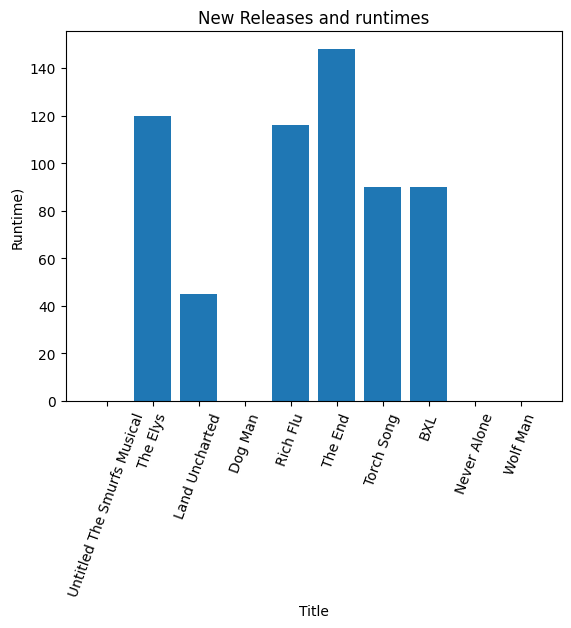

In [17]:
import kaggle
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import git 
import yaml
from datetime import datetime


# Specify the dataset path from Kaggle, this is the datasets slug, if you look at the https of the webpage 
# with the dataset on it the "slug" is everything past "https://www.kaggle.com/datasets/" 
dataset = "akshaypawar7/millions-of-movies"

# This is making the request through the kaggle library, it will make a folder called "movies_dataset" which will have 
# a csv file inside it with the data 
kaggle.api.dataset_download_files(dataset, path="movies_dataset", unzip=True)

# This is just converting the csv file into a workable pandas dataframe
df = pd.read_csv("movies_dataset/movies.csv")

# Convert release_date to datetime format (handling errors)
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Droping rows with NaT in release_date so search for 
df = df.dropna(subset=["release_date"])

# Get the current date
current_date = datetime.today()

# Filter out movies with a release_date in the future
df = df[df["release_date"] < current_date]

# Round vote_average to one decimal place
df["vote_average"] = df["vote_average"].round(1)

# Keep only the desired columns
df = df[["runtime", "title", "release_date", "tagline","vote_average"]]

# Sort by release_date descending and keep the 10 most recent movies
df = df.sort_values(by="release_date", ascending=False).head(10)

# Creating the bar chart 
plt.bar(df["title"],df["runtime"])
plt.xticks(rotation=70)  # Rotates labels by 45 degrees
# Formating the y axis
plt.ticklabel_format(style="plain", axis="y")
# Creating the labels and Title
plt.xlabel("Title")
plt.ylabel("Runtime)")
plt.title("New Releases and runtimes")


current_date = pd.Timestamp.now().strftime("%Y-%m-%d")

plt.savefig(f'New_Releases{current_date}.png', format='png', dpi=300)






